# Task - 02 Supervised Machine Learning
## By, Abhinav Singh
This task is based on Predicting the score of a student based on His/Her no.of Learning Hours.

In [1]:
# Importing all libraries required in this notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline

# Reading data

In [2]:
# Reading data
data= pd.read_csv("student_scores - student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Dividing Data into 'attributes' & 'Labels'

In [3]:
# dividing the data into "attributes" (inputs) and "labels" (outputs).
x = np.asanyarray(data[["Hours"]])
y = np.asanyarray(data[["Scores"]])

# 2-D Plotting Of Scores

Text(0, 0.5, 'Percentage Score')

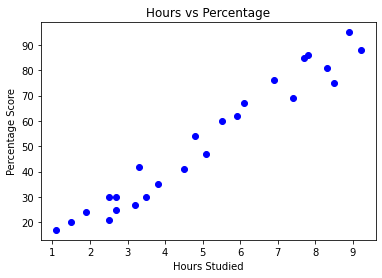

In [4]:
# 2-D Plotting the distribution of scores
plt.scatter(data.Hours, data.Scores,  color='blue')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

# Splitting Data into Training and Test set

In [5]:
# split this data into training and test sets.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

# Training Algorithm

In [6]:
#Training Algo
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.91065648]]
Intercept:  [2.01816004]


# Plotting Of Regression Line

Text(0, 0.5, 'Scores')

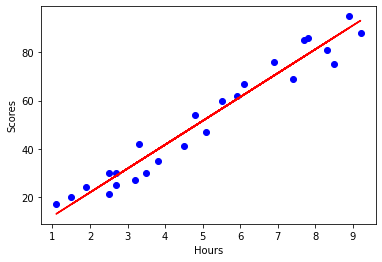

In [7]:
# Plotting the regression line
plt.scatter(data.Hours, data.Scores,  color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")

# Prediction

In [8]:
#PREDICTION
# Testing data - In Hours
print(X_test) 
# Predicting the scores
y_pred = regr.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Testing User Input

In [10]:
#Lets test it with our own data
hours = 9.25
print("No of Hours student studied : ", hours)
print("Predicted Score of student depending upon the hours studied = ", regr.predict(np.array(hours).reshape(1,-1))[0])

No of Hours student studied :  9.25
Predicted Score of student depending upon the hours studied =  [93.69173249]


In [11]:
#Evaluation step
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
